<a href="https://colab.research.google.com/github/Mokaba23/Covid19_Tweet_Sentiment_Analysis/blob/main/Mokaba_Mabuela_assement_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification with Logistic Regression**

Performing statistical inference testing using Logistic Regression model.

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**About the dataset**

We will use the merged dataset of admissions and candidates datasets to predict the job admission status of a candidate.

The dataset includes information about:


*   Candidate info - candidate_id, emp_card_id, name,
*   Demographic info about candidate – gender, age range, and number of children they have.
*   Admission status of the candidate.





In [ ]:
#importing the admission and candidate datasets

admission_df = pd.read_csv(r'/content/sample_data/admissions.csv')
candidate_df = pd.read_csv(r'/content/sample_data/candidates.csv')

In [ ]:

admission_df.head()


,candidate_id,department,admit
0,933951,E,Rejected
1,910365,B,Admitted
2,927783,D,Rejected
3,899904,A,Admitted
4,931437,D,Rejected


In [ ]:
candidate_df.head(20)

,name,candidate_id,age,gender,no_children,emp_card_id
0,Geneva Le,928100,43.0,Female,NaN,7505.0
1,Marilyn Weber,913797,51.0,Male,0.0,NaN
2,Marlene Deweese,926775,30.0,Male,2.0,NaN
3,Lydia Martino,919847,31.0,Female,0.0,NaN
4,Donna Fisher,936127,24.0,Female,0.0,NaN
5,Lena Mendoza,905703,44.0,Female,1.0,2333.0
6,Jay Klingenberg,907375,45.0,Male,2.0,1998.0
7,Lillian Duncan,927271,30.0,Male,2.0,NaN
8,Leopoldo Olson,927704,45.0,Male,NaN,NaN
9,Dan Mathieu,942059,45.0,Male,1.0,NaN


**1. Determine an average age of a candidate**

In [ ]:
#filtering the data,because of the values that were miss entered in the dataset
candidate_df = candidate_df.drop(candidate_df[candidate_df['age'] > 100].index)
candidate_df.head()

,name,candidate_id,age,gender,no_children,emp_card_id
0,Geneva Le,928100,43.0,Female,NaN,7505.0
1,Marilyn Weber,913797,51.0,Male,0.0,NaN
2,Marlene Deweese,926775,30.0,Male,2.0,NaN
3,Lydia Martino,919847,31.0,Female,0.0,NaN
4,Donna Fisher,936127,24.0,Female,0.0,NaN


In [ ]:
#Finding the average
candidate_df['age'].mean()

39.317003113387564

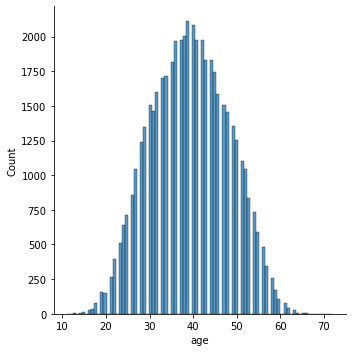

In [ ]:
sns.displot(x='age',data=candidate_df)

The average age in this group of people is 39.

**2. How is the data quality? How do you check for it?**




*   We can check for data quality by performing data profiling.
*   Data profilling is checking the data types in each column.
*   checking for null values and missing values in each column. 

How do we handle missing and null values?

*   we handle missing or null values by either dropping the entire row or replace the values with average of the column.




In [ ]:
#checking the data types within each column
candidate_df.dtypes

name             object
candidate_id      int64
age             float64
gender           object
no_children     float64
emp_card_id     float64
dtype: object

In [ ]:
candidate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49785 entries, 0 to 49785
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49785 non-null  object 
 1   candidate_id  49785 non-null  int64  
 2   age           49785 non-null  float64
 3   gender        49785 non-null  object 
 4   no_children   42438 non-null  float64
 5   emp_card_id   17421 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
candidate_df.describe()

,candidate_id,age,no_children,emp_card_id
count,49785.000000,49785.000000,42438.000000,17421.000000
mean,921358.000000,39.317003,1.052170,5009.395040
std,14371.835913,8.918682,0.885223,2882.143587
min,896466.000000,11.000000,0.000000,0.000000
25%,908912.000000,33.000000,0.000000,2503.000000
50%,921358.000000,39.000000,1.000000,5051.000000
75%,933804.000000,46.000000,2.000000,7503.000000
max,946250.000000,72.000000,4.000000,9999.000000


In [ ]:
#checking for null values in each column
candidate_df.isnull().sum()

name                0
candidate_id        0
age                 0
gender              0
no_children      7347
emp_card_id     32364
dtype: int64

In [ ]:
candidate_df.isna().sum()

name                0
candidate_id        0
age                 0
gender              0
no_children      7347
emp_card_id     32364
dtype: int64

In [ ]:
#choosing colunms that are going to help us train and test the model
candidate_df = candidate_df[['name','candidate_id','age','gender','no_children']]
candidate_df.head()

,name,candidate_id,age,gender,no_children
0,Geneva Le,928100,43.0,Female,NaN
1,Marilyn Weber,913797,51.0,Male,0.0
2,Marlene Deweese,926775,30.0,Male,2.0
3,Lydia Martino,919847,31.0,Female,0.0
4,Donna Fisher,936127,24.0,Female,0.0


In [ ]:
#handling null values by replacing it with the average
mean = candidate_df['no_children'].mean()
candidate_df['no_children'] = candidate_df['no_children'].fillna(mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#changing the data type from float to integer type.
candidate_df = candidate_df.astype({'age': int, 'no_children': int})


In [ ]:
#measuring the quantity of females and males
candidate_df['gender'].value_counts()

Male      29600
Female    20185
Name: gender, dtype: int64

In [ ]:
candidate_df['no_children'].value_counts()

1    20789
0    14116
2    13442
3     1426
4       12
Name: no_children, dtype: int64

In [ ]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64722 entries, 0 to 64721
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   candidate_id  64722 non-null  int64 
 1   department    64722 non-null  object
 2   admit         64722 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
admission_df.describe()

,candidate_id
count,64722.000000
mean,921365.843114
std,14386.537343
min,896465.000000
25%,908888.000000
50%,921393.500000
75%,933816.750000
max,946250.000000


In [ ]:
admission_df.isna().sum()

candidate_id    0
department      0
admit           0
dtype: int64

In [ ]:
admission_df = admission_df.rename(columns ={'admit': 'admit_status'})

In [ ]:
admission_df.isnull().sum()

candidate_id    0
department      0
admit_status    0
dtype: int64

**3. Join both datasets**

In [ ]:
#joing the two tables candidate_df and admision_df
df = candidate_df.merge(admission_df,on = 'candidate_id', how = 'left').drop_duplicates()
df.head(10)

,name,candidate_id,age,gender,no_children,department,admit_status
0,Geneva Le,928100,43,Female,1,D,Admitted
1,Marilyn Weber,913797,51,Male,0,C,Admitted
3,Marlene Deweese,926775,30,Male,2,D,Rejected
5,Lydia Martino,919847,31,Female,0,C,Rejected
7,Donna Fisher,936127,24,Female,0,E,Rejected
8,Lena Mendoza,905703,44,Female,1,A,Admitted
10,Jay Klingenberg,907375,45,Male,2,B,Admitted
11,Lillian Duncan,927271,30,Male,2,D,Rejected
13,Leopoldo Olson,927704,45,Male,1,D,Rejected
14,Dan Mathieu,942059,45,Male,1,F,Rejected


**4. Perform a feature selection process on given data for the model in the next
question**

In [ ]:
#checking relationships between variables
corr= df.corr()
corr

,candidate_id,age,no_children
candidate_id,1.000000,-0.503124,-0.323956
age,-0.503124,1.000000,0.479570
no_children,-0.323956,0.479570,1.000000


In [ ]:
#checking if the gender of the person affects the admition status of their application
df.groupby(['gender'])['admit_status'].value_counts()

gender  admit_status
Female  Rejected        14058
        Admitted         6127
Male    Rejected        16423
        Admitted        13177
Name: admit_status, dtype: int64

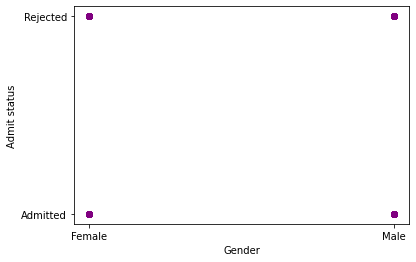

In [ ]:
plt.scatter(df.gender,df.admit_status,color='purple')
plt.xlabel('Gender')
plt.ylabel('Admit status')
plt.show()

The number of rejected and admitted men candidate is higher than the number of rejected and admitted female candidates. 

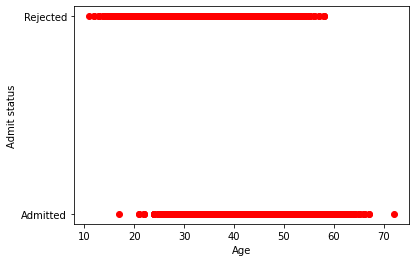

In [ ]:
plt.scatter(df.age,df.admit_status,color='red')
plt.xlabel('Age')
plt.ylabel('Admit status')
plt.show()

In [ ]:

df.groupby(['no_children'])['admit_status'].value_counts()

no_children  admit_status
0            Rejected        13355
             Admitted          761
1            Admitted        10819
             Rejected         9970
2            Admitted         6969
             Rejected         6473
3            Admitted          747
             Rejected          679
4            Admitted            8
             Rejected            4
Name: admit_status, dtype: int64

The most rejected applications are from candidate's with no or 0 children.

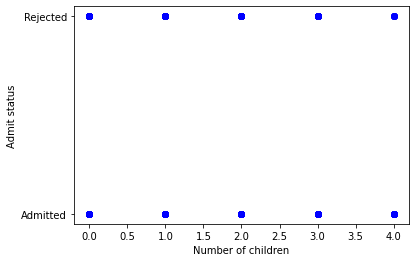

In [ ]:
plt.scatter(df.no_children,df.admit_status,color='blue')
plt.xlabel('Number of children')
plt.ylabel('Admit status')
plt.show()

In [ ]:
df.groupby(['age'])['admit_status'].value_counts()

age  admit_status
11   Rejected         1
12   Rejected         2
13   Rejected         4
14   Rejected         9
15   Rejected        13
                     ..
64   Admitted         9
65   Admitted         6
66   Admitted         5
67   Admitted         2
72   Admitted         1
Name: admit_status, Length: 96, dtype: int64

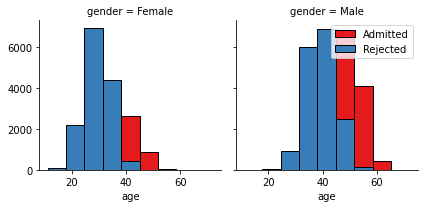

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="admit_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


More females between thier early ages are more rejected than males within the same age.This supports our inference that the age and gender of a candidate affect their admission status.



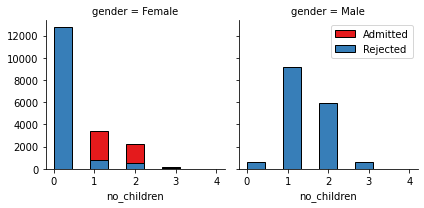

In [ ]:
bins = np.linspace(df.no_children.min(), df.no_children.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="admit_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'no_children', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Males with no kids are more rejected from jobs than females with kids.This supports  our inference that indeed the no_children a person have,it affects your admission status.

In [ ]:
Feature = df[['age','gender','no_children','admit_status']]
Feature.head(10)

,age,gender,no_children,admit_status
0,43,Female,1,Admitted
1,51,Male,0,Admitted
3,30,Male,2,Rejected
5,31,Female,0,Rejected
7,24,Female,0,Rejected
8,44,Female,1,Admitted
10,45,Male,2,Admitted
11,30,Male,2,Rejected
13,45,Male,1,Rejected
14,45,Male,1,Rejected


In [ ]:
#one hot coding on the gender column to get categorical values to feed to the model
Feature['gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)
Feature.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,age,gender,no_children,admit_status
0,43,1,1,Admitted
1,51,0,0,Admitted
3,30,0,2,Rejected
5,31,1,0,Rejected
7,24,1,0,Rejected


**Feature selection**

In [ ]:
X = Feature[['age','gender','no_children']]
X[0:5]

,age,gender,no_children
0,43,1,1
1,51,0,0
3,30,0,2
5,31,1,0
7,24,1,0


In [ ]:
y = Feature['admit_status'].values
y[0:5]

array(['Admitted', 'Admitted', 'Rejected', 'Rejected', 'Rejected'],
      dtype=object)

Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )



In [ ]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.4129572 ,  1.21096469, -0.05439912],
       [ 1.30995974, -0.82578791, -1.27764229],
       [-1.04467194, -0.82578791,  1.16884405],
       [-0.93254662,  1.21096469, -1.27764229],
       [-1.71742385,  1.21096469, -1.27764229]])


**5.Train a model that given selected features predicts the likelihood of a
candidate being admitted** 

**Model building**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (39828, 3) (39828,)
Test set: (9957, 3) (9957,)


Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
training_accuracy = lr.score(x_train,y_train)

In [ ]:
y_hat_train = lr.predict(x_train)
y_hat_train[0:5]

array(['Rejected', 'Admitted', 'Admitted', 'Admitted', 'Rejected'],
      dtype=object)

In [ ]:
y_train[0:5]

array(['Rejected', 'Rejected', 'Admitted', 'Admitted', 'Rejected'],
      dtype=object)

In [ ]:
lr.fit(x_test,y_test)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
testing_accuracy = lr.score(x_test,y_test)

In [ ]:
y_hat_test = lr.predict(x_test)
y_hat_test[0:5]

array(['Rejected', 'Rejected', 'Rejected', 'Rejected', 'Admitted'],
      dtype=object)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [ ]:
yhat_prob = lr.predict_proba(x_test)
yhat_prob

array([[0.4958292 , 0.5041708 ],
       [0.04560359, 0.95439641],
       [0.09146051, 0.90853949],
       ...,
       [0.18677666, 0.81322334],
       [0.20627995, 0.79372005],
       [0.06167441, 0.93832559]])

**6. Verify the model you have trained using a metric of your choice.**

**Classification**

Train Test split

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print (classification_report(y_train, y_hat_train))


              precision    recall  f1-score   support

    Admitted       0.84      0.79      0.82     15416
    Rejected       0.87      0.90      0.89     24412

    accuracy                           0.86     39828
   macro avg       0.86      0.85      0.85     39828
weighted avg       0.86      0.86      0.86     39828



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print (classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

    Admitted       0.85      0.82      0.83      3888
    Rejected       0.89      0.90      0.89      6069

    accuracy                           0.87      9957
   macro avg       0.87      0.86      0.86      9957
weighted avg       0.87      0.87      0.87      9957



The classification Logistic Regression model is performing well with both the testing and training set.

**7. Is there any discrimination going on in the company’s hiring?**

Yes there is, the admission status of a candidate is dependent on the gender, age and number of children the candidate.